In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [4]:
df_train = pd.read_csv(r'train.csv')
df_train.info()

# print(f"train_shape: {df_train.shape}")
# print(f"test_shape: {df_test.shape}")

C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_28296\1686653622.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(r'train.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1118822 non-null  object 
 1   번지                      1118597 non-null  object 
 2   본번                      1118747 non-null  float64
 3   부번                      1118747 non-null  float64
 4   아파트명                    1116696 non-null  object 
 5   전용면적(㎡)                 1118822 non-null  float64
 6   계약년월                    1118822 non-null  int64  
 7   계약일                     1118822 non-null  int64  
 8   층                       1118822 non-null  int64  
 9   건축년도                    1118822 non-null  int64  
 10  도로명                     1118822 non-null  object 
 11  해제사유발생일                 5983 non-null     float64
 12  등기신청일자                  1118822 non-null  object 
 13  거래유형                    1118822 non-null  object 
 14  중개

#### 1. 서울시 편의시설(커피숍,  카페,  편의점,  패스트푸드) 데이터 추가

In [5]:
df_cafe = pd.read_csv('서울시 휴게음식점 인허가 정보.csv', encoding='utf-8')
df_cafe.head()

C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_28296\3579299348.py:1: DtypeWarning: Columns (13,25,28,29,30,36,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cafe = pd.read_csv('서울시 휴게음식점 인허가 정보.csv', encoding='utf-8')


,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,3210000,3210000-104-2023-00148,2023-05-19,NaN,3,폐업,2,폐업,2023-05-27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3050000,3050000-104-2023-00055,2023-04-24,NaN,3,폐업,2,폐업,2023-05-28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3160000,3160000-104-2024-00069,2024-04-12,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3220000,3220000-104-2024-00217,2024-04-12,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3070000,3070000-104-2024-00065,2024-04-12,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# '구' 정보 추출
pattern = r'(\S+구)'
df_cafe['구'] = df_cafe['지번주소'].str.extract(pattern, expand=False).dropna()

# 각 '구'의 개수 카운트
count_by_gu = df_cafe['구'].value_counts()

# 결과 출력
print(count_by_gu)

## 부평구, 수정구는 서울시 아님

강남구     15266
송파구      8812
서초구      8445
중구       7946
영등포구     7064
마포구      6556
강서구      5690
종로구      5189
서대문구     4992
강동구      4869
양천구      4841
관악구      4555
성북구      4502
광진구      4448
구로구      4401
동대문구     4340
노원구      4263
은평구      3913
용산구      3650
동작구      3466
성동구      3459
중랑구      3165
금천구      2641
강북구      2549
도봉구      2386
부평구         1
수정구         1
Name: 구, dtype: int64


In [7]:
# '상세영업상태명' 열의 값들 추출
unique_status_names = df_cafe['상세영업상태명'].unique()

# 결과 출력
print(unique_status_names)

['폐업' '영업']


In [8]:
# '상세영업상태명'이 '영업'인 경우에만 '구' 정보 추출
pattern = r'(\S+구)'
df_cafe['구'] = df_cafe[df_cafe['상세영업상태명'] == '영업']['지번주소'].str.extract(pattern, expand=False).dropna()

# 각 '구'의 개수 카운트
count_by_gu = df_cafe['구'].value_counts()

# 결과 출력
print(count_by_gu)

강남구     3875
송파구     2587
중구      2217
서초구     2173
영등포구    2077
강서구     1986
마포구     1939
종로구     1740
관악구     1381
성북구     1353
광진구     1342
강동구     1328
노원구     1308
은평구     1248
동대문구    1240
서대문구    1172
구로구     1153
용산구     1094
동작구     1070
성동구     1064
양천구     1048
중랑구     1005
금천구      976
강북구      774
도봉구      698
수정구        1
Name: 구, dtype: int64


C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_28296\3917211590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='개수', y='구', data=df_count_by_gu, palette='viridis')


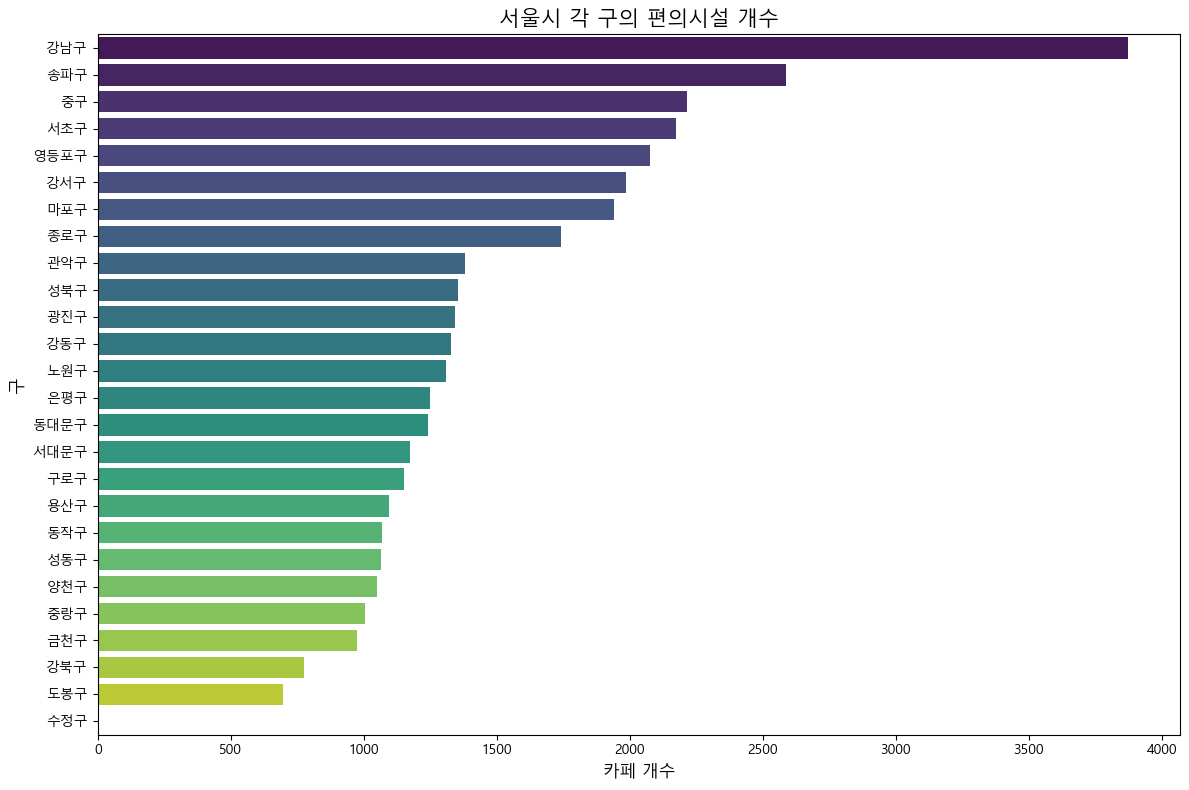

In [9]:
# 한글
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# df 생성
df_count_by_gu = pd.DataFrame(list(count_by_gu.items()), columns=['구', '개수'])

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='개수', y='구', data=df_count_by_gu, palette='viridis')
plt.title('서울시 각 구의 편의시설 개수', fontsize=15)
plt.xlabel('카페 개수', fontsize=12)
plt.ylabel('구', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [10]:
# 정규화 - 채택
normalized_values = {
    '강남구': 3870,
    '송파구': 2585,
    '중구': 2216,
    '서초구': 2174,
    '영등포구': 2078,
    '강서구': 1986,
    '마포구': 1940,
    '종로구': 1740,
    '관악구': 1380,
    '성북구': 1352,
    '광진구': 1342,
    '강동구': 1325,
    '노원구': 1307,
    '은평구': 1249,
    '동대문구': 1240,
    '서대문구': 1171,
    '구로구': 1153,
    '용산구': 1094,
    '동작구': 1069,
    '성동구': 1065,
    '양천구': 1048,
    '중랑구': 1005,
    '금천구': 976,
    '강북구': 773,
    '도봉구': 698
}

# 최소값과 최대값 계산
min_value = min(normalized_values.values())
max_value = max(normalized_values.values())

# 각 구의 정규화된 값을 계산하여 출력
for gu, value in normalized_values.items():
    normalized_value = (value - min_value) / (max_value - min_value)
    print(f'{gu}: {normalized_value:.4f}')

강남구: 1.0000
송파구: 0.5949
중구: 0.4786
서초구: 0.4653
영등포구: 0.4351
강서구: 0.4061
마포구: 0.3916
종로구: 0.3285
관악구: 0.2150
성북구: 0.2062
광진구: 0.2030
강동구: 0.1977
노원구: 0.1920
은평구: 0.1737
동대문구: 0.1709
서대문구: 0.1491
구로구: 0.1434
용산구: 0.1248
동작구: 0.1170
성동구: 0.1157
양천구: 0.1103
중랑구: 0.0968
금천구: 0.0876
강북구: 0.0236
도봉구: 0.0000


In [11]:
# 결과값 딕셔너리로 변수에 저장 
normalized_results = {
    '강남구': 1.0000,
    '송파구': 0.5949,
    '중구': 0.4786,
    '서초구': 0.4653,
    '영등포구': 0.4351,
    '강서구': 0.4061,
    '마포구': 0.3916,
    '종로구': 0.3285,
    '관악구': 0.2150,
    '성북구': 0.2062,
    '광진구': 0.2030,
    '강동구': 0.1977,
    '노원구': 0.1920,
    '은평구': 0.1737,
    '동대문구': 0.1709,
    '서대문구': 0.1491,
    '구로구': 0.1434,
    '용산구': 0.1248,
    '동작구': 0.1170,
    '성동구': 0.1157,
    '양천구': 0.1103,
    '중랑구': 0.0968,
    '금천구': 0.0876,
    '강북구': 0.0236
}

print(normalized_results)

{'강남구': 1.0, '송파구': 0.5949, '중구': 0.4786, '서초구': 0.4653, '영등포구': 0.4351, '강서구': 0.4061, '마포구': 0.3916, '종로구': 0.3285, '관악구': 0.215, '성북구': 0.2062, '광진구': 0.203, '강동구': 0.1977, '노원구': 0.192, '은평구': 0.1737, '동대문구': 0.1709, '서대문구': 0.1491, '구로구': 0.1434, '용산구': 0.1248, '동작구': 0.117, '성동구': 0.1157, '양천구': 0.1103, '중랑구': 0.0968, '금천구': 0.0876, '강북구': 0.0236}


In [12]:
# '구' 정보 추출하여 상수 값 매핑
df_train['구'] = df_train['시군구'].str.extract(r'(\S+구)', expand=False)

# 각 '구'에 해당하는 상수 값 추가
df_train['휴게음식점'] = df_train['구'].map(normalized_results)

# '구' 컬럼 삭제
df_train = df_train.drop(columns=['구'])

# CSV 파일로 저장
df_train.to_csv('merge_1.csv', index=False)

In [13]:
df_output = pd.read_csv('merge_1.csv') 
df_output.tail()

C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_28296\2353124340.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_output = pd.read_csv('merge_1.csv')


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,휴게음식점
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000,0.1737
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000,0.1737
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000,0.1737
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000,0.1737
1118821,서울특별시 중구 묵정동,11-67,11.0,67.0,묵정,52.46,200701,10,5,1981,...,45.0,임의,2020-07-10 00:00:00.0,Y,Y,127.000071,37.560706,2017-09-05 20:06:39.0,13250,0.4786


In [14]:
total_rows = len(df_output['휴게음식점'])
print(f'휴게음식점 열의 전체 행의 개수: {total_rows}')
total_rows = len(df_output['시군구'])
print(f'시군구 열의 전체 행의 개수: {total_rows}')

휴게음식점 열의 전체 행의 개수: 1118822
시군구 열의 전체 행의 개수: 1118822
